# INTRODUCTION


Fraudulent transactions in the financial services sector constantly pose a threat to organizations. The fact that fraudulent transactions are relatively rare and represent a small fraction of total activities within an organization makes fraud detection very challenging. However, by employing appropriate machine learning tools, systems can learn, identify and adapt to emerging fraud patterns.

This mini-project involves credit card fraud detection using Logistic Regression.

The dataset, gotten from Kaggle, has 31 features, 28 of which have been anonymized and are labeled V1 through V28. The remaining three features are the time, transaction amount as well as the class (whether that transaction was fraudulent or not). The anonymized variables were processed using Principal Component Analysis (PCA).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score

In [3]:
df = pd.read_csv('creditcard.csv')

# Exploratory Data Analysis

In [4]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [5]:
#Show number of normal transactions and fraudulent transactions
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [6]:
# print percentage of fraudulent transactions in dataset
(len(df.loc[df.Class==1])) / (len(df.loc[df.Class == 0])) * 100

0.17304750013189596

In the dataset, there are 284315 non-fraudulent transactions and 492 fraudulent transactions. The fraudulent transactions are 0.173% of all transactions which re-iterates this dataset is highly imbalanced.

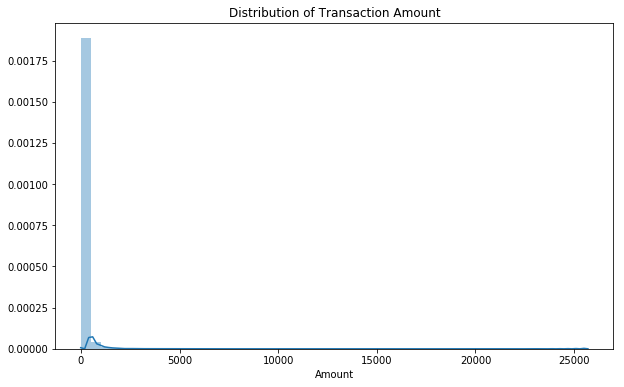

In [10]:
#Plot showing the Distribution of the Transaction Amount Feature
plt.figure(figsize=(10,6))
plt.title('Distribution of Transaction Amount')
sns.distplot(df.Amount)

With a mean transaction amount of about 88 dollars and a maximum transaction amount of 25,691 dollars, it is clear that the distribution is highly skewed to the right.

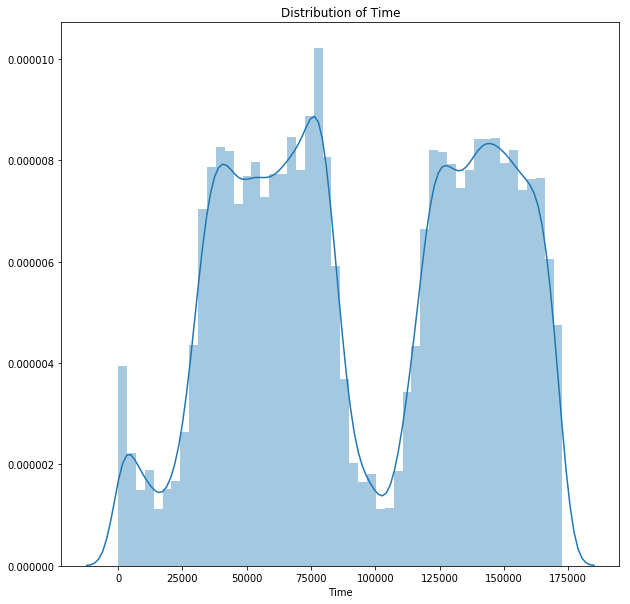

In [11]:
#Plot showing the Distribution of the Transaction Time Feature
plt.figure(figsize=(10,10))
plt.title('Distribution of Time')
sns.distplot(df.Time)

There is roughly a 24-hour window between the two minima (where number of transactions carried out are lowest). This period may be considered as night-time.

# Data Pre-Processing

In [12]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler_time = StandardScaler()
scaler_amount = StandardScaler()

#Scaling time feature
scaled_time = scaler_time.fit_transform(df[['Time']])
list_time = [item for sublist in scaled_time.tolist() for item in sublist]
scaled_time = pd.Series(list_time)

#Scaling Amount feature
scaled_amount = scaler_amount.fit_transform(df[['Amount']])
list_amount = [item for sublist in scaled_amount.tolist() for item in sublist]
scaled_amount = pd.Series(list_amount)

#Concatening new columns to dataframe
df = pd.concat([df, scaled_amount.rename('scaled_amount'), scaled_time.rename('scaled_time')], axis=1)

In [15]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,scaled_amount,scaled_time
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.244964,-1.996583
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.342475,-1.996583
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1.160686,-1.996562
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.140534,-1.996562
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,-0.073403,-1.996541


In [16]:
#Deleting unscaled columns i.e. Time and Amount
df.drop(['Amount', 'Time'], axis=1, inplace=True)

In [17]:
#Splitting the dataset into Test and Train
X = df.drop('Class', axis=1)
y = df.Class

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

As is typical with datasets of credit card fraud transactions, there is a high imbalance present. This means that there is a disproportionate ratio of observations between the fraudulent and non-fraudulent transactions. This poses a common problem that must be taken care of.

I employed Synthetic Minority Oversampling Technique (SMOTE), a popular algorithm to create sythetic observations of the minority class. This helps to balance the dataset.

In [19]:
#Balance dataset using SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=27, ratio=1.0)
X_train, y_train = sm.fit_sample(X_train, y_train)

# Algorithm Fitting

In [20]:
#Applying Logistic Regression Algo to balanced dataset
smote = LogisticRegression(solver='liblinear').fit(X_train, y_train)

smote_pred = smote.predict(X_test)

In [21]:
#Checking for F1 score
f1_score(y_test, smote_pred)

0.1236133122028526

In [22]:
pd.DataFrame(confusion_matrix(y_test, smote_pred))

,0,1
0,69426,1644
1,15,117


In [23]:
#Checking for Accuracy
accuracy_score(y_test, smote_pred)

0.9767000926940255

In [24]:
recall_score(y_test, smote_pred)

0.8863636363636364